In [186]:
import pandas as pd

In [187]:
df=pd.read_csv(r"C:\Users\Asus\Documents\Stock-MArket-Forecasting\AAPL.csv")

In [188]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [189]:
df1=df.reset_index()['close']

In [190]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

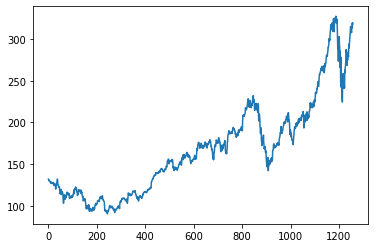

In [191]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show

In [192]:
import numpy as np

In [193]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
#reshape (-1,1)convert the given matrix into that many rows and 1 columns e.g 100 item convert into 100*1 2-d array
#reshape(1,-1)convert the given matrix into that many columns and 1 rows e.g 100 items convert into 1*100 2-d array
df1=scalar.fit_transform(np.array(df1).reshape(-1,1))

In [194]:
#splitting the dataset into trainset and testset
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
#[:,0]and [:,:1]means the first mean simply give the first column.It give 1-d array
# it given 1-d array. while  second mean for every row give the first from 0 to1 (1exculded). It give 2d array
train_data,test_data=df1[:train_size,:],df1[train_size:,:]


In [195]:
train_data.shape,test_data.shape,len(df1)

((817, 1), (441, 1), 1258)

In [196]:
#preparation of data
#we convert list to array as convert it into 2d array as list shape is not defined.
# we cannot reshape list but we can reshape an array
import numpy
def raw_data(dataset,time_step=1):
    set_X=[]
    set_Y=[]
    for i in range(len(dataset)-time_step-1):
        set_X.append(dataset[i:time_step+i,0])
        set_Y.append(dataset[time_step+i,0])
    return numpy.array(set_X),numpy.array(set_Y)
    

In [197]:

time_step=100
train_X,train_Y=raw_data(train_data,time_step)
test_X,test_Y=raw_data(test_data,time_step)

In [198]:
train_Y.shape

(716,)

In [199]:
#converting to 3-d vector
train_X=train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X=test_X.reshape(test_X.shape[0],test_X.shape[1],1)


In [200]:
#import from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [201]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [202]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [203]:
train_X.shape,train_Y.shape,test_X.shape,test_Y.shape

((716, 100, 1), (716,), (340, 100, 1), (340,))

In [204]:
# model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=100,batch_size=64,verbose=1)
model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=100,batch_size=64,verbose=1)


Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 11s 15ms/sample - loss: 0.0095 - val_loss: 0.0553
Epoch 2/100
716/716 [==============================] - 4s 5ms/sample - loss: 0.0024 - val_loss: 0.0074
Epoch 3/100
716/716 [==============================] - 4s 6ms/sample - loss: 8.4220e-04 - val_loss: 0.0042
Epoch 4/100
716/716 [==============================] - 4s 6ms/sample - loss: 6.9323e-04 - val_loss: 0.0037
Epoch 5/100
716/716 [==============================] - 4s 6ms/sample - loss: 6.5088e-04 - val_loss: 0.0037
Epoch 6/100
716/716 [==============================] - 4s 6ms/sample - loss: 7.2080e-04 - val_loss: 0.0036
Epoch 7/100
716/716 [==============================] - 4s 6ms/sample - loss: 6.7531e-04 - val_loss: 0.0036
Epoch 8/100
716/716 [==============================] - 4s 6ms/sample - loss: 6.1042e-04 - val_loss: 0.0045
Epoch 9/100
716/716 [==============================] - 4s 6ms/sample - loss: 6.0265e-04 - val_loss: 0.00

716/716 [==============================] - 7s 10ms/sample - loss: 2.3141e-04 - val_loss: 0.0012
Epoch 77/100
716/716 [==============================] - 8s 11ms/sample - loss: 2.3103e-04 - val_loss: 0.0013
Epoch 78/100
716/716 [==============================] - 8s 11ms/sample - loss: 2.4337e-04 - val_loss: 0.0015
Epoch 79/100
716/716 [==============================] - 8s 11ms/sample - loss: 2.3549e-04 - val_loss: 0.0012
Epoch 80/100
716/716 [==============================] - 8s 11ms/sample - loss: 2.2954e-04 - val_loss: 0.0011
Epoch 81/100
716/716 [==============================] - 7s 10ms/sample - loss: 2.4628e-04 - val_loss: 0.0014
Epoch 82/100
716/716 [==============================] - 7s 10ms/sample - loss: 2.3223e-04 - val_loss: 0.0013
Epoch 83/100
716/716 [==============================] - 8s 10ms/sample - loss: 2.1458e-04 - val_loss: 0.0011
Epoch 84/100
716/716 [==============================] - 8s 11ms/sample - loss: 2.1035e-04 - val_loss: 0.0013
Epoch 85/100
716/716 [==========

In [205]:
import tensorflow as tf


In [206]:
tf.__version__

'2.1.0'

In [207]:
#making prediction from the LSTM model
train_predict=model.predict(train_X)
test_predict=model.predict(test_X)

In [208]:
train_predict.shape

(716, 1)

In [209]:
# transforming back to original from as we had normalised it before.
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [210]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_Y,train_predict))


142.573070459808

In [211]:
math.sqrt(mean_squared_error(test_Y,test_predict))

243.98928847484416

In [212]:
train_predict.shape

(716, 1)

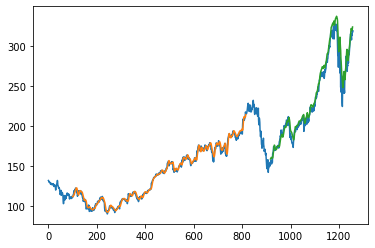

In [218]:
#making adjustment for plotting
look_back=100
train_predict_plot=np.empty_like(df1)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]=train_predict
#similarily for test
test_predict_plot=np.empty_like(df1)
test_predict_plot[:,:]=np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plotting
# b=scalar.inverse_transform(df1)
# plt.plot(b)
plt.plot(scalar.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)



In [219]:
train_predict_plot[110]

array([118.29640961])

In [220]:
train_predict.shape,test_predict.shape,test_predict_plot.shape,train_predict_plot.shape

((716, 1), (340, 1), (1258, 1), (1258, 1))

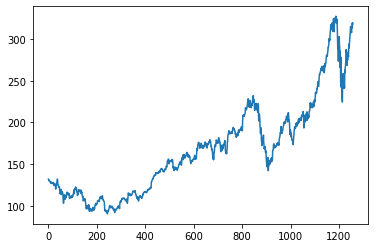

In [221]:
b=scalar.inverse_transform(df1)
plt.plot(b)

In [294]:
#no use step
l=np.empty_like(df1)
l[:,:]=np.nan


In [295]:
train_data.shape

(817, 1)

In [296]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [297]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(temp_input)

100

In [298]:
x_input = x_input.reshape((1, n_steps,1))

In [299]:
x_input.shape

(1, 100, 1)

In [300]:
# from numpy import array

# lst_output=[]
# n_steps=100
# i=0
# while(i<30):
    
#     if(len(temp_input)>100):
#         #print(temp_input)
#         x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
#         x_input=x_input.reshape(1,-1)
#         x_input = x_input.reshape((1, n_steps, 1))
#         #print(x_input)
#         yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
#         temp_input.extend(yhat[0].tolist())
#         temp_input=temp_input[1:]
#         #print(temp_input)
#         lst_output.extend(yhat.tolist())
#         i=i+1
#     else:
#         x_input = x_input.reshape((1, n_steps,1))
#         yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
#         temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
#         lst_output.extend(yhat.tolist())
#         i=i+1
    

# print(lst_output)

In [301]:
#prediction for the next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while i<30:
    if (len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print(" {} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        y_hat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,y_hat))
        temp_input.extend(y_hat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(y_hat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        y_hat=model.predict(x_input,verbose=0)
        print(y_hat[0])
#         temp_input.extend(y_hat[0].tolist())
        temp_input.extend(y_hat[0].tolist())
        print(len(temp_input))

     
        lst_output.extend(y_hat.tolist())
        i=i+1
        
        
print(lst_output)

[1.0023273]
101
 1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

9 day input [[1.173854]]
 10 day input [0.93304061 0.94950604 0.96424048 0.95512117 0.95989192 0.96635143
 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453
 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625
 0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  

17 day input [[1.2899334]]
 18 day input [0.9598497  0.98792536 0.98594106 0.92531453 0.92172591 0.96474711
 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575 1.
 0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 1.00232732 1.01708066
 1.03594148 1.0564791  1.07740

26 day input [[1.3963451]]
 27 day input [0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 1.00232732 1.01708066 1.03594148 1.0564791  1.07740641
 1.0981071  1.11825728 1.13766193 1.15620899 1.17385399 1.19060969
 1.20653319 1.22171175 1.

In [303]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [304]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [305]:
import matplotlib.pyplot as plt

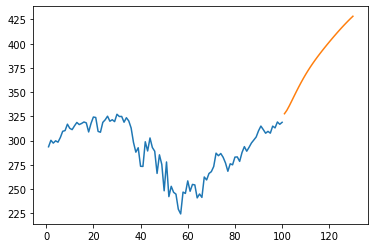

In [307]:
plt.plot(day_new,scalar.inverse_transform(df1[1158:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

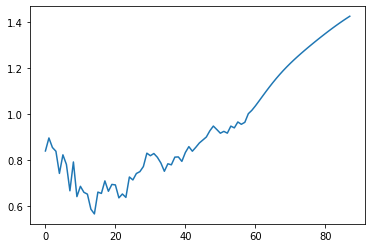

In [308]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scalar.inverse_transform(df3).tolist()
